## LABORATORIO 2
JOSE RICARDO MERIDA LOPEZ


Para este laboratorio estaremos trabajando con Pyton y la aplicacion de modelos vistos en clase, 
para ello debe descargar el dataset que se encuentra en el GES y responder las siguientes preguntas: 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("databici.csv")
# un vistazo dentro del set de datos
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## PREGUNTA 1

¿Qué rango de hora es la de mayor demanda?

In [5]:
#forma 1
#df1=df[["hr","cnt"]]
#df1=df1.groupby(['hr'])['cnt'].agg('sum')
#print(df1)


#forma 2
df1=df.groupby('hr', as_index=False)['cnt'].sum()
is_max = df1.loc[:, 'cnt']==df1["cnt"].max()
df_max = df1.loc[is_max]
df_max.head()


,hr,cnt
17,17,336860


## PREGUNTA 2

¿Qué temporada es la mas alta?

In [6]:
df2=df.groupby('season', as_index=False)['cnt'].sum()
is_max_2 = df2.loc[:, 'cnt']==df2["cnt"].max()
df2_max = df2.loc[is_max_2]
df2_max.head()

,season,cnt
2,3,1061129


## PREGUNTA 3

¿Es la temperatura relevante para el modelo?

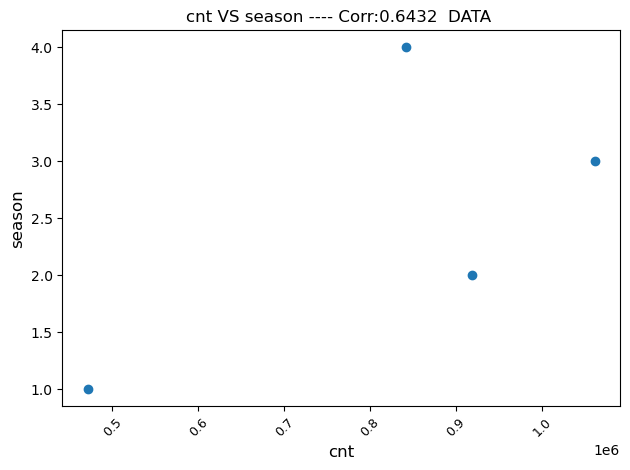

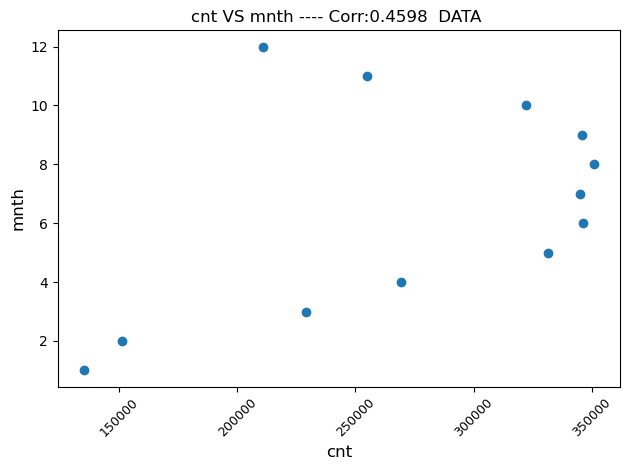

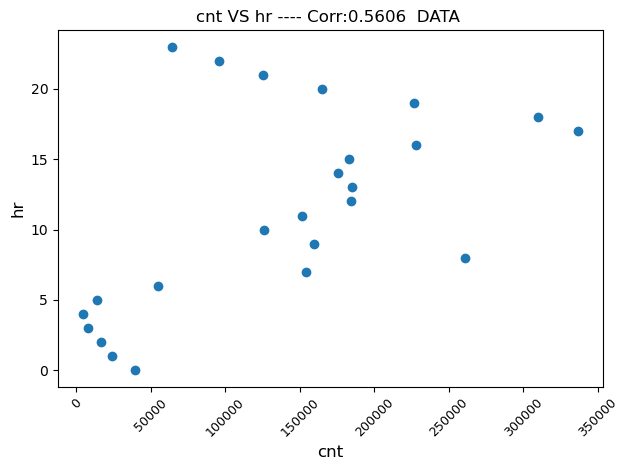

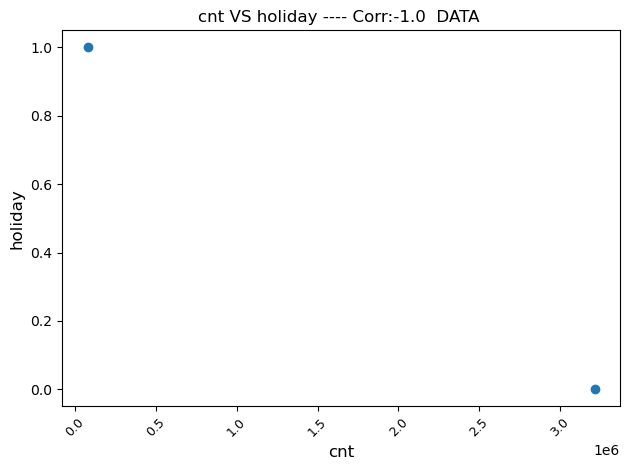

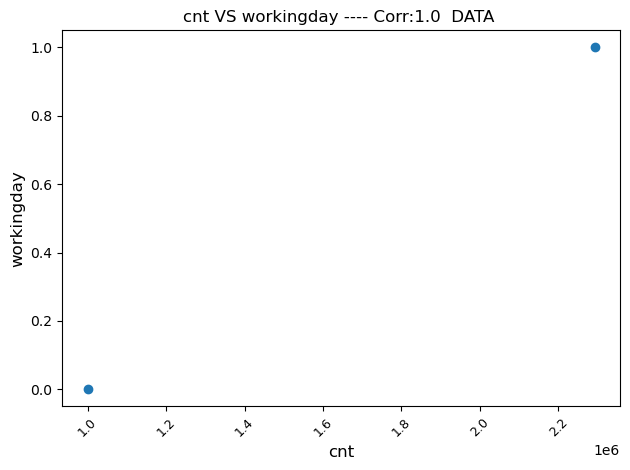

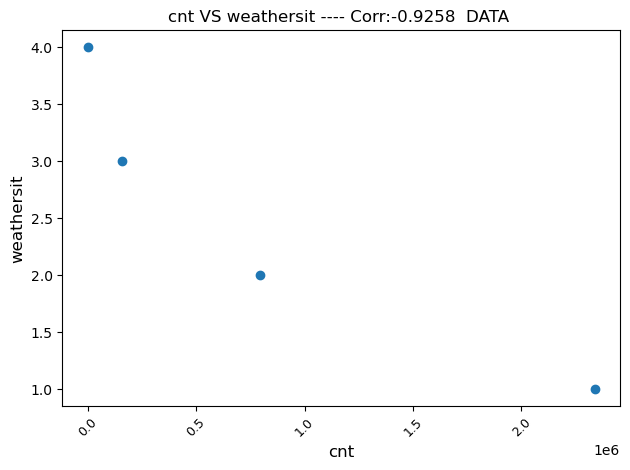

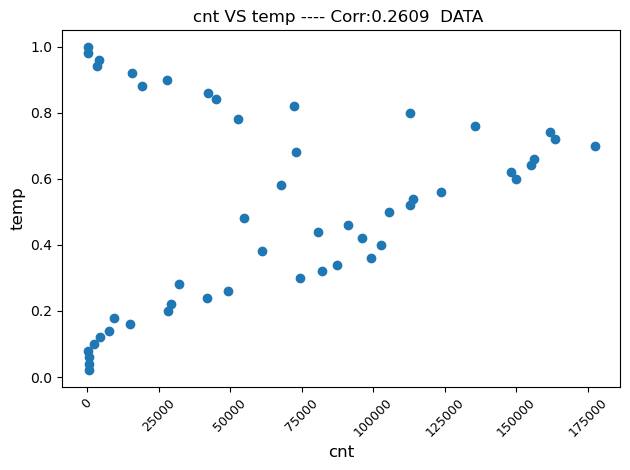

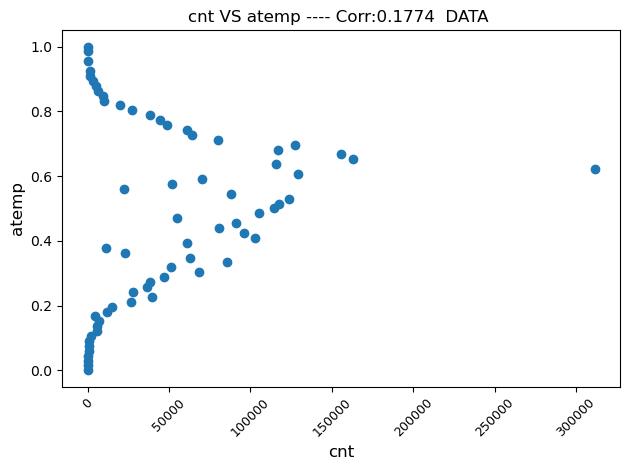

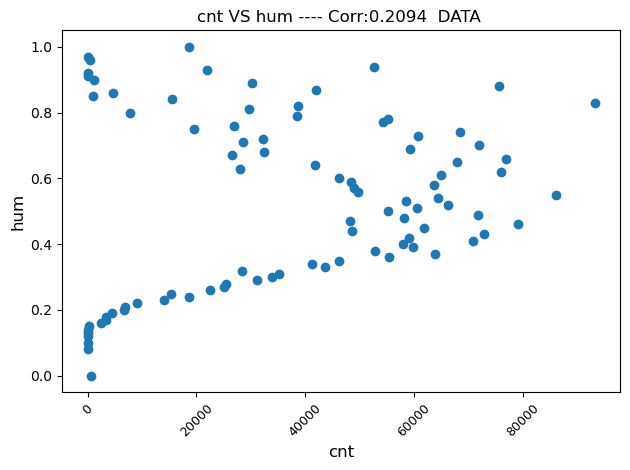

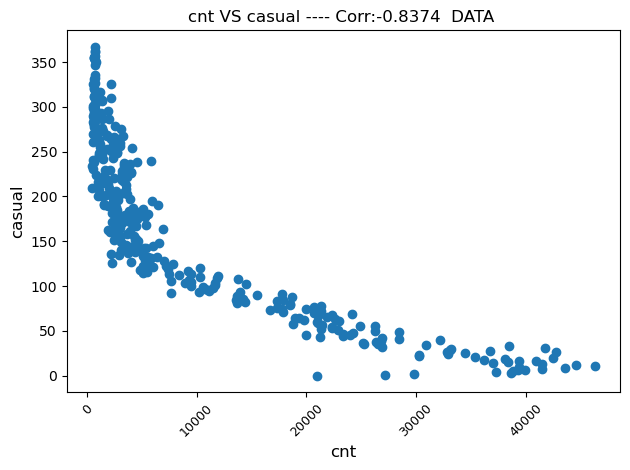

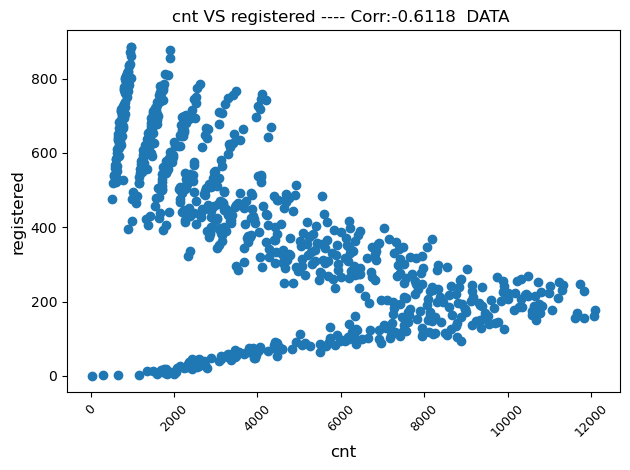

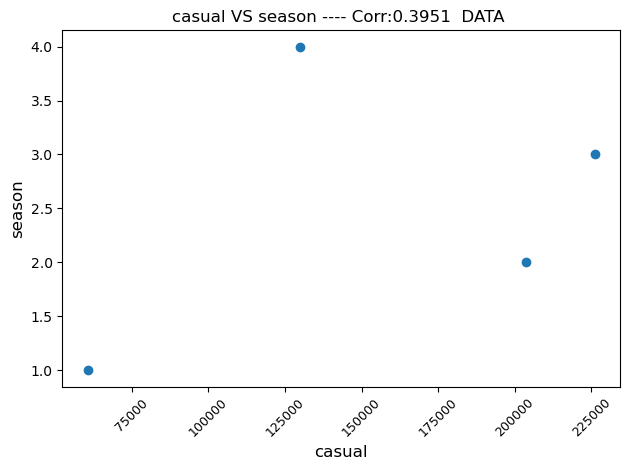

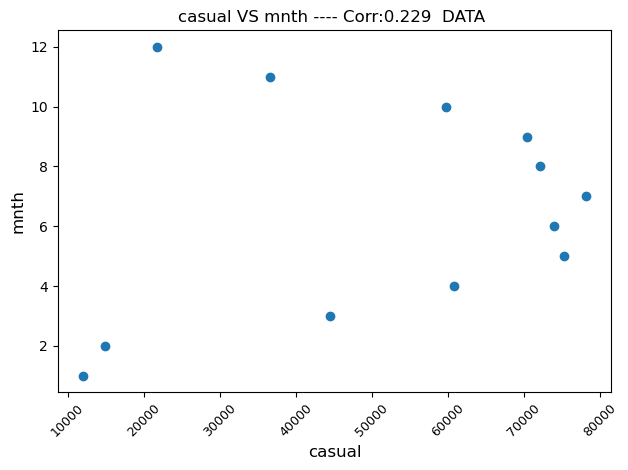

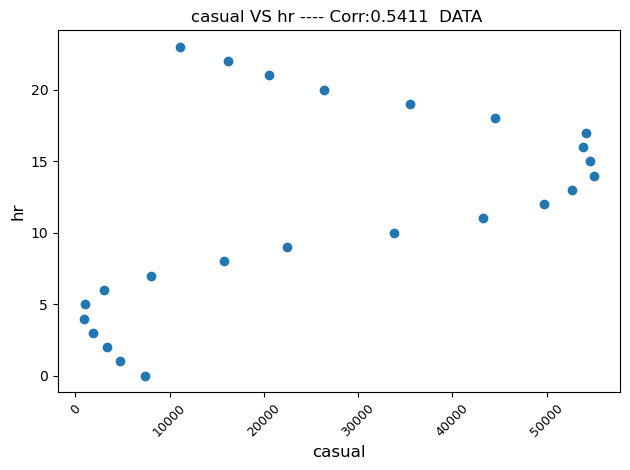

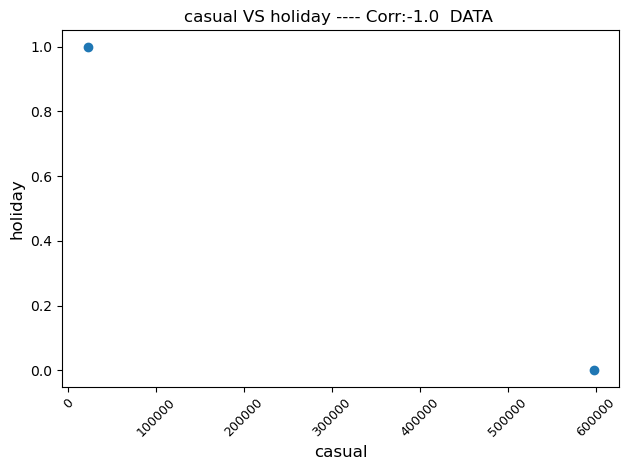

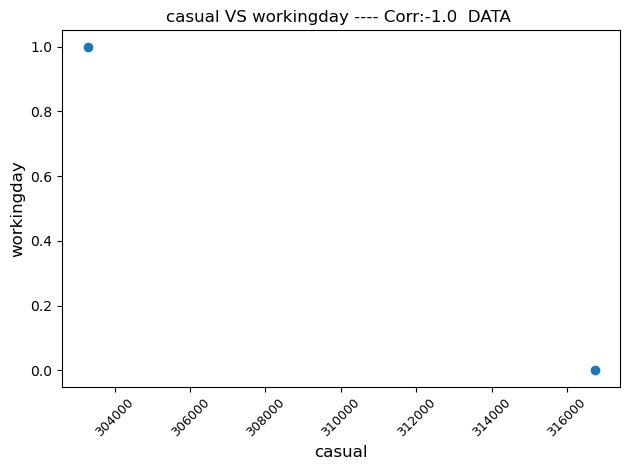

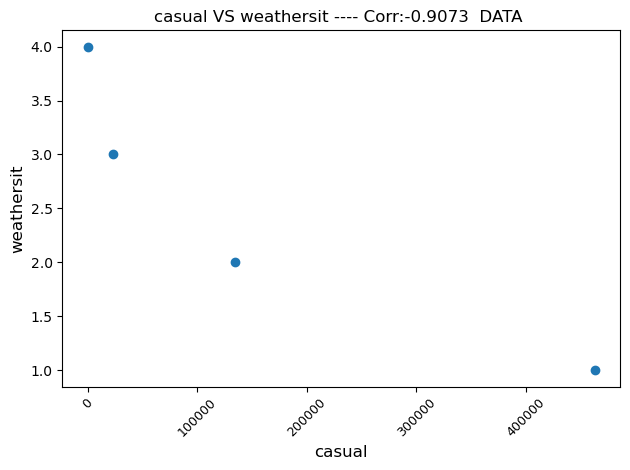

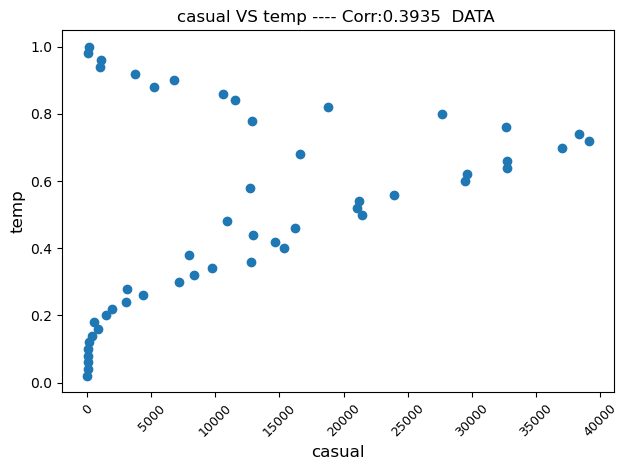

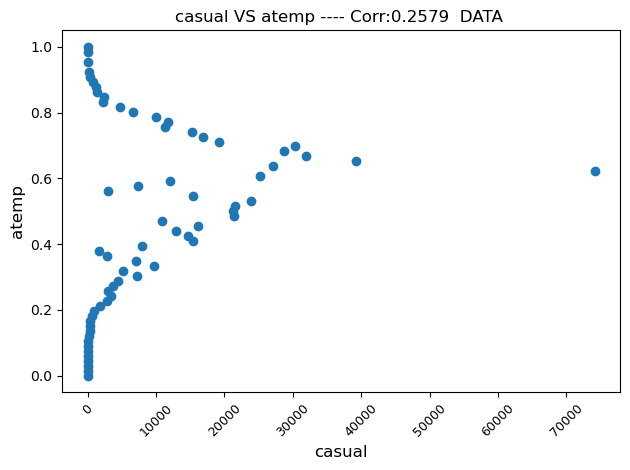

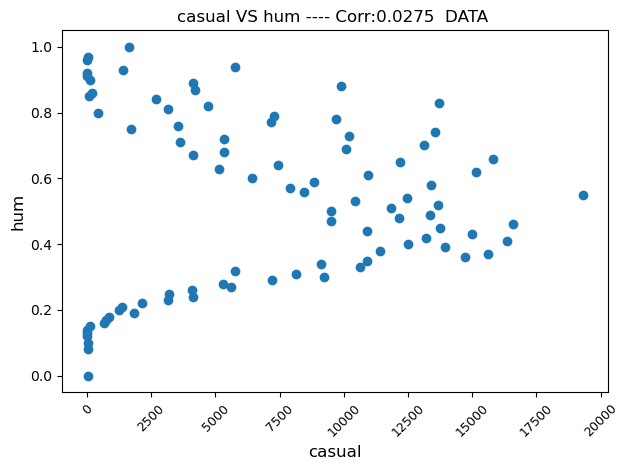

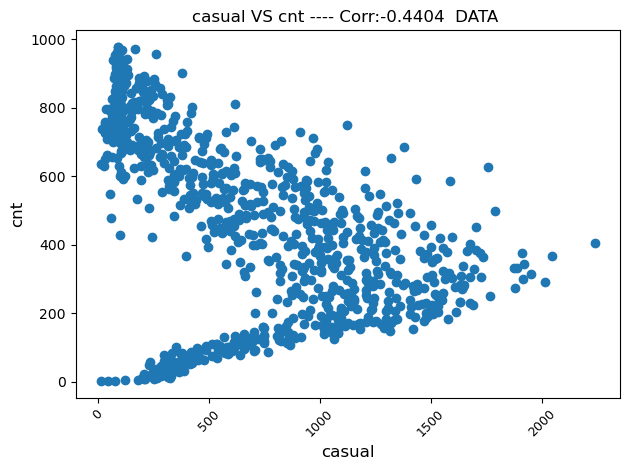

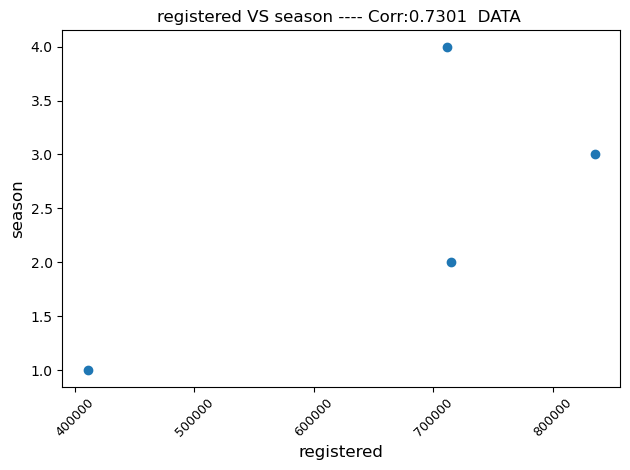

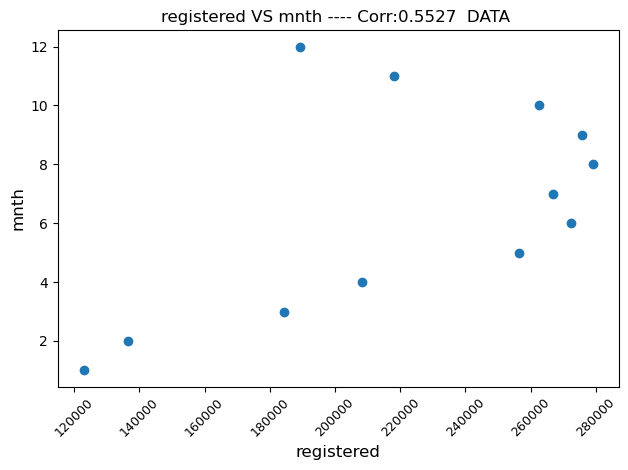

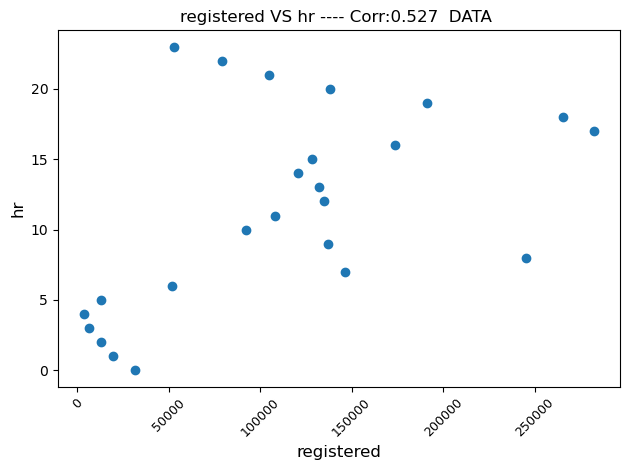

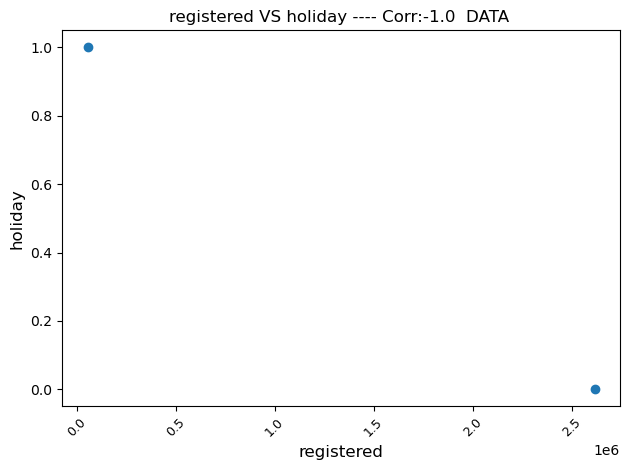

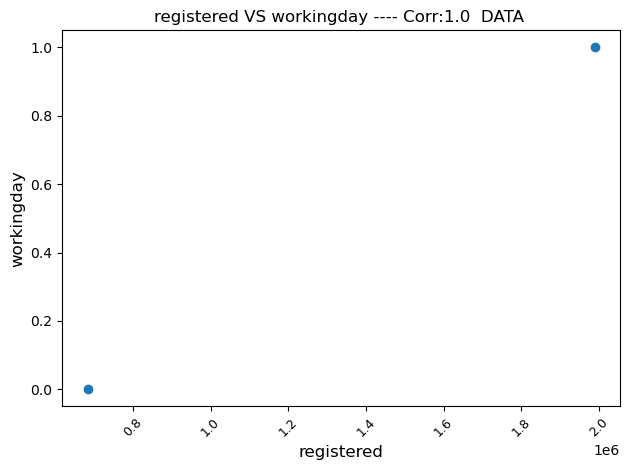

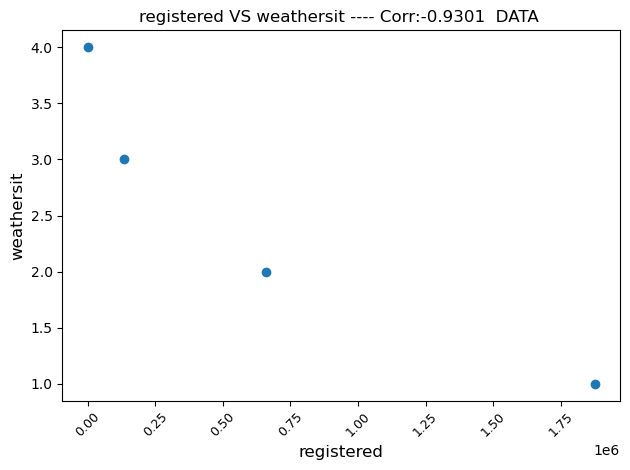

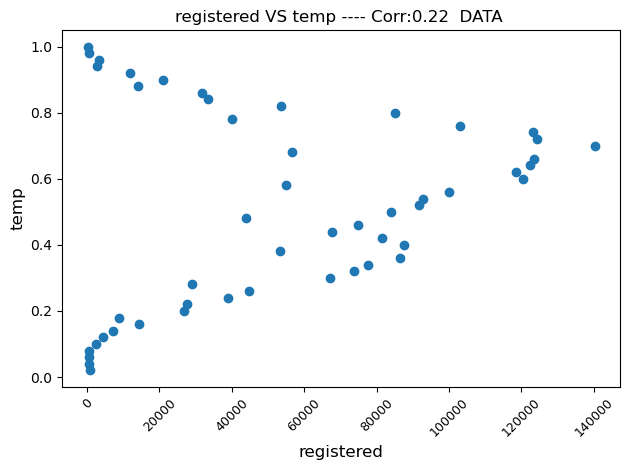

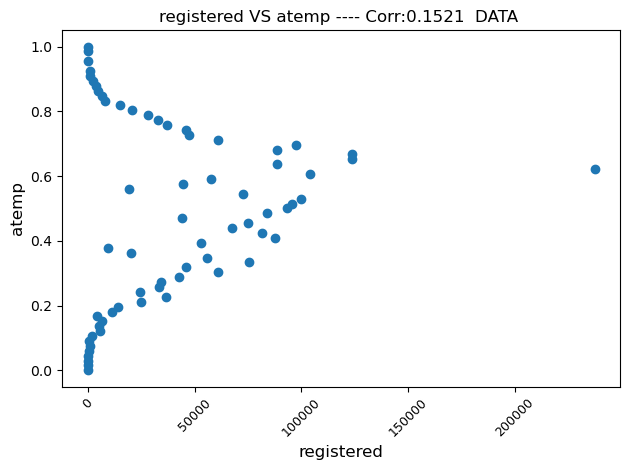

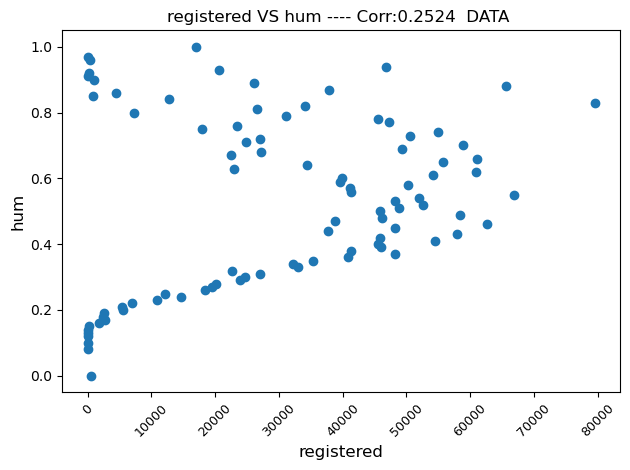

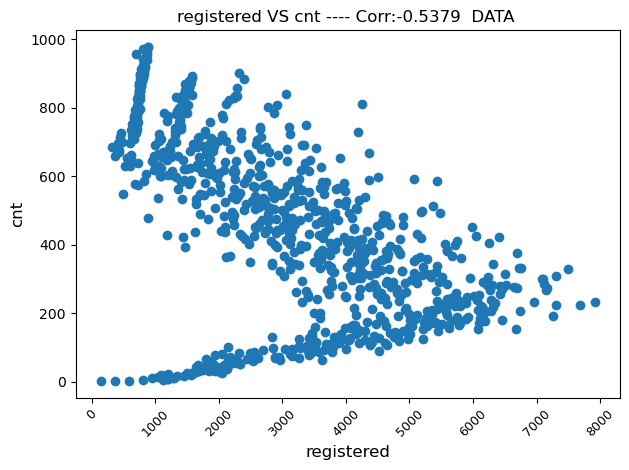

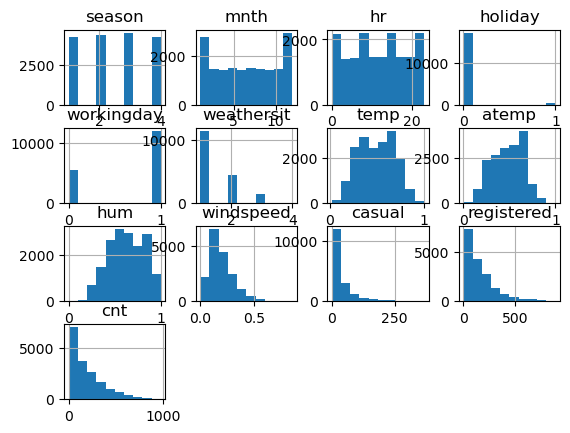

In [7]:

# ------------------------------------------------- inicio  funcion correlacion entre variables ----------------------------------------------------

def factor_correlacion(data,lista_graf_2,num_parejas): # valores de correlacion

  list_corr=[]

  cont_1=0

  lista_columns_2=[]

  if num_parejas>len(lista_graf_2):

    print("ERROR EL VALOR DE LAS PAREJAS ES MAYOR A LA CANTIDAD DE LAS LISTAS")

  else:

    try:

      for i in lista_graf_2:

          cont_1+=1

          data_1=data[[i[1],i[0]]].dropna()

          data_1=data_1.groupby(i[0], as_index=False)[i[1]].sum()

          corr_1=data_1.corr().values.tolist()

          key=i[1]+" VS "+i[0]

          corr_value=round(corr_1[0][1],4)

          lista_columns_2.append(key)

          list_corr.append(corr_value)

          array_data_1=data_1.values.tolist()

          array2=np.reshape(array_data_1,-1)

          lista_x=array2[0:-1:2]

          lista_y=array2[1::2]          


          plt.scatter(lista_y,lista_x)
          plt.title(f"{key} ---- Corr:{corr_value}  DATA ", fontsize = 12)
          plt.xticks(fontsize=9, rotation=45)
          plt.xlabel(i[1],fontsize=12)
          plt.ylabel(i[0],fontsize=12)
          plt.tight_layout()
          plt.show()


      data_valores_corr = pd.DataFrame(list_corr, index=lista_columns_2, columns=["CORRELATIVO"])

      data_valores_corr = data_valores_corr.sort_values('CORRELATIVO',ascending=False)

      data_valores_entre_0_1=data_valores_corr.loc[data_valores_corr["CORRELATIVO"]!= 1, :]

      if (data_valores_entre_0_1.shape[0])>=num_parejas:

          row_1=data_valores_entre_0_1.head(num_parejas)

      else:

          row_1=data_valores_corr

      return data_valores_corr, row_1

    except: 

      print("Error al generar las graficas de las correlaciones")
      
      pass


# ------------------------------------------------- fin  funcion correlacion entre variables ----------------------------------------------------

# ------------------------------------------------- inicio  variables dataframe ----------------------------------------------------

list_1=['season','mnth','hr','holiday',"workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]

cnt_df = df[list_1]

#cnt_df.head(10)
# ------------------------------------------------- fin  variables dataframe ----------------------------------------------------

# ------------------------------------------------- inicio  graficar usando la funcion correlacion ----------------------------------------------------


lista_graf_2=[["season","cnt"],
    ["mnth","cnt"],
    ["hr","cnt"],
    ["holiday","cnt"],
    ["workingday","cnt"],
    ["weathersit","cnt"],
    ["temp","cnt"],
    ["atemp","cnt"],
    ["hum","cnt"],
    ["casual","cnt"],
    ["registered","cnt"]] 

factor_correlacion(cnt_df,lista_graf_2,2)


lista_graf_3=[["season","casual"],
    ["mnth","casual"],
    ["hr","casual"],
    ["holiday","casual"],
    ["workingday","casual"],
    ["weathersit","casual"],
    ["temp","casual"],
    ["atemp","casual"],
    ["hum","casual"],
    ["cnt","casual"]] 

factor_correlacion(cnt_df,lista_graf_3,2)

lista_graf_4=[["season","registered"],
    ["mnth","registered"],
    ["hr","registered"],
    ["holiday","registered"],
    ["workingday","registered"],
    ["weathersit","registered"],
    ["temp","registered"],
    ["atemp","registered"],
    ["hum","registered"],
    ["cnt","registered"]] 

factor_correlacion(cnt_df,lista_graf_4,2)

# ------------------------------------------------- fin  graficar usando la funcion correlacion ----------------------------------------------------
viz = cnt_df[list_1]
viz.hist()
plt.show()

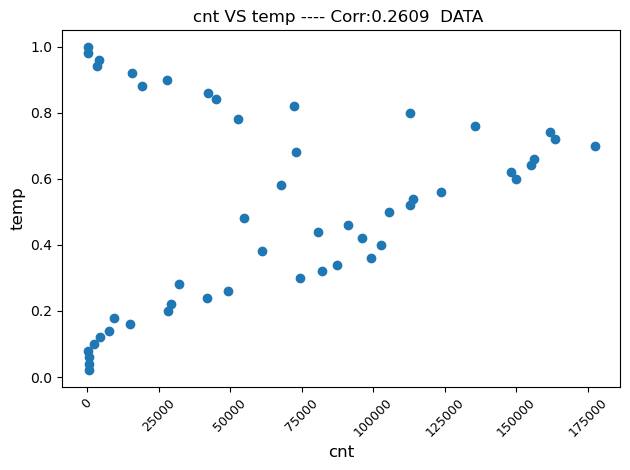

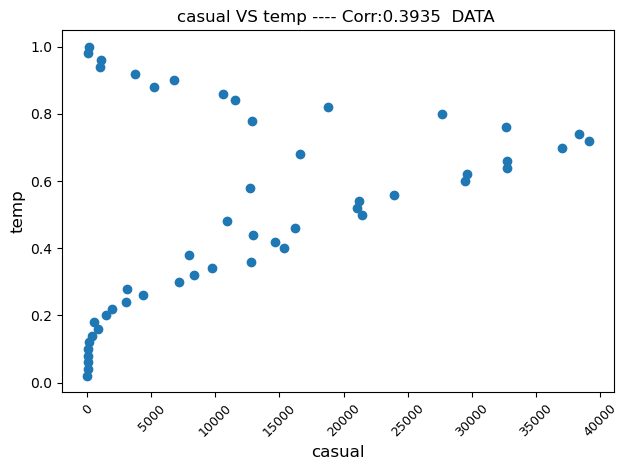

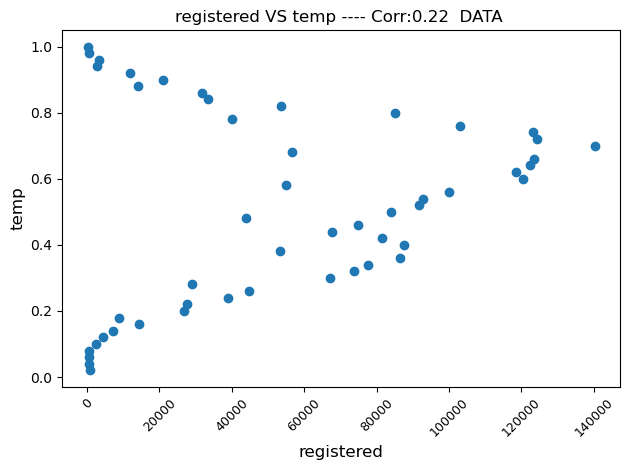

(                    CORRELATIVO
 casual VS temp           0.3935
 cnt VS temp              0.2609
 registered VS temp       0.2200,
                 CORRELATIVO
 casual VS temp       0.3935
 cnt VS temp          0.2609)

In [8]:
lista_graf_2=[
    ["temp","cnt"],
    ["temp","casual"],
    ["temp","registered"]] 

factor_correlacion(cnt_df,lista_graf_2,2)

Considero que si es influye, la mayor cantidad de alquileres es 0.2-0.8.





## PREGUNTA 4

¿Es la humedad relevante para el modelo?


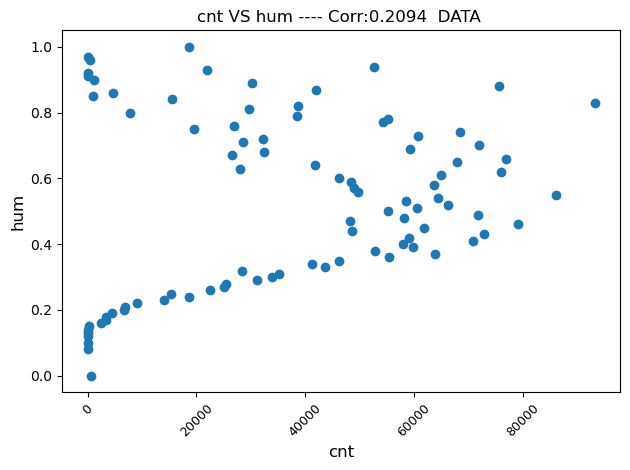

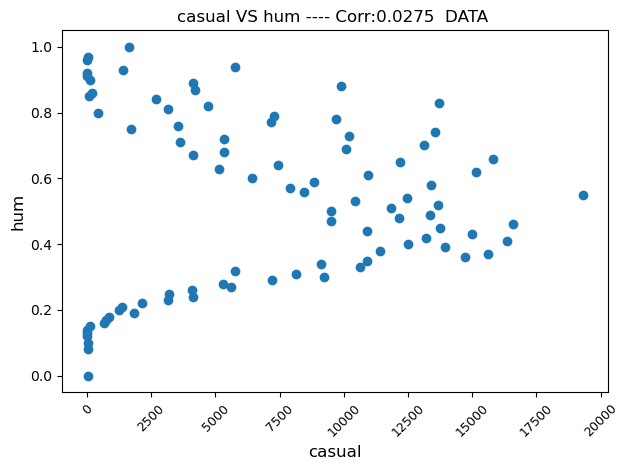

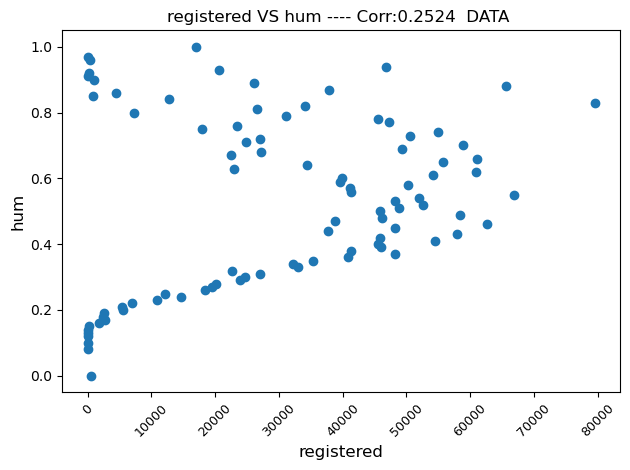

(                   CORRELATIVO
 registered VS hum       0.2524
 cnt VS hum              0.2094
 casual VS hum           0.0275,
                    CORRELATIVO
 registered VS hum       0.2524
 cnt VS hum              0.2094)

In [9]:
lista_graf_2=[
    ["hum","cnt"],
    ["hum","casual"],
    ["hum","registered"]] 

factor_correlacion(cnt_df,lista_graf_2,2)

Considero que si es influye, la mayor cantidad de alquileres es 0.2-0.9.

## PREGUNTA 5

¿Qué condiciones serian ideales para nuestra demanda?

1. humedad 0.5 
2. temperatura 0.7
3. hora 16:00
4. mes 8 (agosto)
5. temporada 3

## Para finalizar, debe de utilizar los conocimientos adquiridos en clase para presentar un modelo que permita estimar la demanda de bicicletas para eventos futuros, recuerde no sobreajustar el modelo. 

In [11]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

train_data = pd.read_csv('databici.csv')

# Remove rows with missing target values, Eliminar filas a las que les faltan valores objetivo
train_data.dropna(axis=0, subset=['cnt'], inplace=True)


y = train_data.cnt # Target variable, variable objetivo


# Removing target variable from training data, 
# Eliminación de la variable objetivo de los datos de entrenamiento
train_data.drop(['cnt'], axis=1, inplace=True)


numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()

print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))

print(X.head()) # Show first 5 training examples
print(y.head()) # Show first 5 target examples

Shape of input data: (17379, 15) and shape of target variable: (17379,)
   instant  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0        1       1   0     1   0        0        6           0           1   
1        2       1   0     1   1        0        6           0           1   
2        3       1   0     1   2        0        6           0           1   
3        4       1   0     1   3        0        6           0           1   
4        5       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  
0  0.24  0.2879  0.81        0.0       3          13  
1  0.22  0.2727  0.80        0.0       8          32  
2  0.22  0.2727  0.80        0.0       5          27  
3  0.24  0.2879  0.75        0.0       3          10  
4  0.24  0.2879  0.75        0.0       0           1  
0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64


In [ ]:
dic_data_resultados={}
dic_variables={}



split = 1
Coefficients:  [  19.83233627   -3.05548152    8.39318239  -30.48108247    2.1687862
   45.10080185  231.14014554 -265.94390147   36.66711204]
Intercept:  99.66171773723724
Error medio absoluto: 92.66
Suma residual de los cuadrados (MSE): 13465.92
R2-score: -0.29


split = 2
Coefficients:  [ 2.06691607e+01 -2.97734895e-02  7.03686252e+00 -3.31334983e+01
 -5.30603492e+00  2.18817483e+02  1.96638974e+02 -2.10339564e+02
  1.26733922e+01]
Intercept:  11.063938168278753
Error medio absoluto: 135.18
Suma residual de los cuadrados (MSE): 23692.20
R2-score: -1.52


split = 3
Coefficients:  [ 2.10555830e+01  3.99014844e+00  8.15121897e+00 -1.37396630e+01
 -1.43022008e-01  9.05308012e+01  2.14869691e+02 -2.36745792e+02
  4.76901258e+01]
Intercept:  9.675748735279996
Error medio absoluto: 93.18
Suma residual de los cuadrados (MSE): 15500.37
R2-score: -0.45


split = 4
Coefficients:  [  23.68039396    1.03896882    6.74661522  -24.53821699    0.27045132
  106.09091084  157.90886349 -20

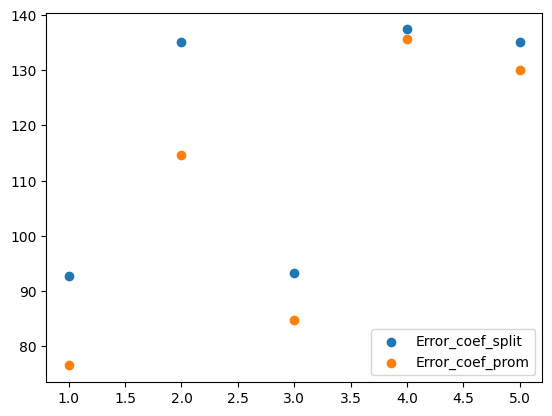

   split  coef_season  coef_mnth   coef_hr  coef_holiday  coef_weathersit  \
0    1.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
1    2.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
2    3.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
3    4.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
4    5.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
5    1.0    19.832336  -3.055482  8.393182    -30.481082         2.168786   
6    2.0    20.669161  -0.029773  7.036863    -33.133498        -5.306035   
7    3.0    21.055583   3.990148  8.151219    -13.739663        -0.143022   
8    4.0    23.680394   1.038969  6.746615    -24.538217         0.270451   
9    5.0     5.434052  -1.875264  6.956793    -22.122695        -4.592341   

    coef_temp  coef_atemp    coef_hum  coef_windspeed  Intercept  \
0  107.403368  213.881270 -220.781600       28.276115  39.190627   
1  107.403368  2

In [ ]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# Vamos a dividir los datos en 5 pliegues.
# Usaremos este objeto 'kf' (estrategia de división de KFold) como entrada para el método cross_val_score()
kf =KFold(n_splits=5, shuffle=False, random_state=None)

#n_splits es para dividirlos en lotes
#shuffle es para que mezclar los datos antes de dividirlos en lotes.
#random_state es para crear aleatoriedad de cada pliegue
#para este ejercicio queremos que tome los primeros datos, los segundos, y asi sucesivamente

cnt = 1
# split()  method generate indices to split data into training and test set.
# El método split() genera índices para dividir los datos en conjuntos de entrenamiento y prueba.

# df = df.filter(items = [2], axis=0)

from sklearn import linear_model
from sklearn.metrics import r2_score
from pandas._libs.lib import dicts_to_array

regr3 = linear_model.LinearRegression()

dic_result={}

for train_index, test_index in kf.split(X, y):
    #print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}') # caracteristicas de la seleccion
    #print(train_index) #estos son los indices que se usaran

    print()
    print()
    print(f"split = {cnt}")

    #................. start training ....................................
    X_1=X.filter(items = train_index, axis=0)
    Y_1=y.filter(items = train_index, axis=0)
    #print(X_1) dataframe solo de los valores de entrenamiento
    #print(Y_1) dataframe solo de los valores objetivo

    train_x = np.asanyarray(X_1[['season','mnth','hr','holiday',"weathersit","temp","atemp","hum","windspeed"]])
    train_y = np.asanyarray(Y_1)
    test_y_=regr3.fit (train_x, train_y)
    # The coefficients
    print ('Coefficients: ', regr3.coef_)
    print ('Intercept: ',regr3.intercept_)
    #................. finish training ....................................
    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)    

    test_x = np.asanyarray(X_2[['season','mnth','hr','holiday',"weathersit","temp","atemp","hum","windspeed"]])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = regr3.predict(test_x)

    print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_result[cnt]=[regr3.coef_.tolist(),regr3.intercept_,round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1


#nombre de columnas de dataframe resultados

lista_nombres_columnas=["split",'coef_season','coef_mnth','coef_hr','coef_holiday',"coef_weathersit","coef_temp","coef_atemp","coef_hum","coef_windspeed","Intercept","Error_medio_abs",
                        "Suma_residual","R2-score"]
dict_result_1={}
list_temp=[]

# .............. inicio pasar todo a un dataframe de resultados ....................

for i in dic_result:
  list_temp.append(i)

  for ii in dic_result[i][0]:
    list_temp.append(ii)
  
  for ii in dic_result[i][1:]:
    list_temp.append(ii)

  dict_result_1[i]=list_temp

  list_temp=[]

for i in dict_result_1:

  list_temp.append(dict_result_1[i])

array_temp_2=np.array(list_temp)

#print(array_temp_2)

data_result=pd.DataFrame(array_temp_2,columns=lista_nombres_columnas)

print(data_result)

# .............. fin pasar todo a un dataframe de resultados ....................

# .............. inicio conseguir el valor medio de los coeficientes y el intercepto ...........

data_valor_medio=data_result[['coef_season','coef_mnth','coef_hr','coef_holiday',"coef_weathersit","coef_temp","coef_atemp","coef_hum","coef_windspeed","Intercept"]].mean()

print()
print("VALORES DE LOS MEJORES COEFICIENTES Y EL INTERCEPTO, OBTENIDOS DEL PROMEDIO DE USAR 5 SPLITS CON ---> K-fold cross validation")
print("Valores_coef_promedio")
print(data_valor_medio)

# .............. fin conseguir el valor medio de los coeficientes y el intercepto ...........

# .............. inicio analizar el training con los nuevos valores ...........

array_coeficientes=np.array(data_valor_medio.values.tolist())

dic_array_split={}

cnt = 1

print()
print()

for train_index, test_index in kf.split(X, y):

    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)
    X_2['Intercept']=1    

    test_x = np.asanyarray(X_2[['season','mnth','hr','holiday',"weathersit","temp","atemp","hum","windspeed","Intercept"]])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = test_x.dot(array_coeficientes)

    #print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    #print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    #print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_array_split[cnt]=[array_coeficientes.tolist(),round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1

#print(dic_array_split)
# .............. fin analizar el training con los nuevos valores ...........

# .............. inicio pasar todo a un dataframe de resultados ....................

dic_result_2={}

list_temp=[]

for i in dic_array_split:
  list_temp.append(i)

  for ii in dic_array_split[i][0]:
    list_temp.append(ii)

  for ii in dic_array_split[i][1:]:
    list_temp.append(ii)

  dic_result_2[i]=list_temp

  list_temp=[]

for i in dic_result_2:

  list_temp.append(dic_result_2[i])

array_temp=np.array(list_temp)

array_temp=np.insert(array_temp, array_temp.shape[1], np.array((1, 1, 1, 1, 1)), 1)
array_temp_2=np.insert(array_temp_2, array_temp_2.shape[1], np.array((0, 0, 0, 0, 0)), 1)

array_temp_3=np.concatenate((array_temp, array_temp_2), axis=0)

#print(array_temp_3)

lista_nombres_columnas.append("classification")

data_result_2=pd.DataFrame(array_temp_3,columns=lista_nombres_columnas)

#print(data_result_2)

data_filter_1=data_result_2[(data_result_2["classification"]==1)]
data_filter_0=data_result_2[(data_result_2["classification"]==0)]

x_graf_0=data_filter_0[["split"]].values.tolist()
y_graf_0=data_filter_0[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf_0, y_graf_0,label="Error_coef_split")
x_graf=data_filter_1[["split"]].values.tolist()
y_graf=data_filter_1[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf, y_graf,label="Error_coef_prom")
plt.legend()
plt.show()

print(data_result_2)
# .............. fin pasar todo a un dataframe de resultados ....................

data_result_2["analisis"]="todas_las_variables"

dic_data_resultados["todas_las_variables"]=data_result_2

dic_variables["todas_las_variables"]=['season','mnth','hr','holiday',"weathersit","temp","atemp","hum","windspeed","Intercept"]






split = 1
Coefficients:  [11.91466683]
Intercept:  177.24857265486034
Error medio absoluto: 124.14
Suma residual de los cuadrados (MSE): 19378.24
R2-score: -545.88


split = 2
Coefficients:  [34.10842129]
Intercept:  109.65339193556089
Error medio absoluto: 129.01
Suma residual de los cuadrados (MSE): 23715.52
R2-score: -56.71


split = 3
Coefficients:  [42.25181524]
Intercept:  92.96117304140031
Error medio absoluto: 123.86
Suma residual de los cuadrados (MSE): 22847.01
R2-score: -4.87


split = 4
Coefficients:  [33.66692037]
Intercept:  84.7920106349806
Error medio absoluto: 182.55
Suma residual de los cuadrados (MSE): 56974.79
R2-score: -178.14


split = 5
Coefficients:  [19.66527642]
Intercept:  130.12709250103944
Error medio absoluto: 171.52
Suma residual de los cuadrados (MSE): 50533.51
R2-score: -185.63
   split  coef_season   Intercept  Error_medio_abs  Suma_residual  R2-score
0    1.0    11.914667  177.248573         124.1446     19378.2419 -545.8845
1    2.0    34.108421  1

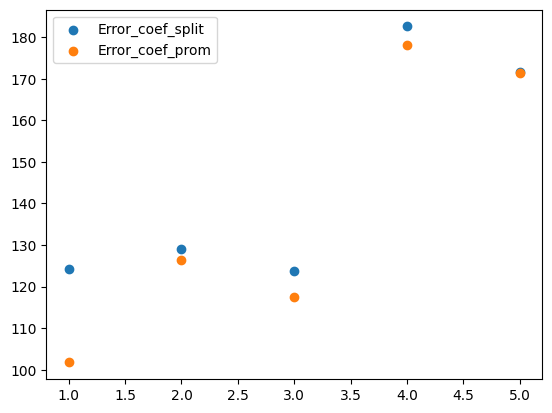

   split  coef_season   Intercept  Error_medio_abs  Suma_residual  R2-score  \
0    1.0    28.321420  118.956448         101.7672     14097.9639  -69.4160   
1    2.0    28.321420  118.956448         126.4604     23161.8289  -80.7460   
2    3.0    28.321420  118.956448         117.5142     20251.1040  -10.5801   
3    4.0    28.321420  118.956448         178.0594     52917.7594 -234.1165   
4    5.0    28.321420  118.956448         171.3774     48863.9413  -86.0083   
5    1.0    11.914667  177.248573         124.1446     19378.2419 -545.8845   
6    2.0    34.108421  109.653392         129.0056     23715.5206  -56.7076   
7    3.0    42.251815   92.961173         123.8597     22847.0081   -4.8699   
8    4.0    33.666920   84.792011         182.5527     56974.7932 -178.1380   
9    5.0    19.665276  130.127093         171.5234     50533.5144 -185.6302   

   classification  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
5         

In [ ]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# Vamos a dividir los datos en 5 pliegues.
# Usaremos este objeto 'kf' (estrategia de división de KFold) como entrada para el método cross_val_score()
kf =KFold(n_splits=5, shuffle=False, random_state=None)

#n_splits es para dividirlos en lotes
#shuffle es para que mezclar los datos antes de dividirlos en lotes.
#random_state es para crear aleatoriedad de cada pliegue
#para este ejercicio queremos que tome los primeros datos, los segundos, y asi sucesivamente

cnt = 1
# split()  method generate indices to split data into training and test set.
# El método split() genera índices para dividir los datos en conjuntos de entrenamiento y prueba.

# df = df.filter(items = [2], axis=0)

regr3 = linear_model.LinearRegression()

dic_result={}

for train_index, test_index in kf.split(X, y):
    #print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}') # caracteristicas de la seleccion
    #print(train_index) #estos son los indices que se usaran

    print()
    print()
    print(f"split = {cnt}")

    #................. start training ....................................
    X_1=X.filter(items = train_index, axis=0)
    Y_1=y.filter(items = train_index, axis=0)
    #print(X_1) dataframe solo de los valores de entrenamiento
    #print(Y_1) dataframe solo de los valores objetivo

    train_x = np.asanyarray(X_1[['season']])
    train_y = np.asanyarray(Y_1)
    test_y_=regr3.fit (train_x, train_y)
    # The coefficients
    print ('Coefficients: ', regr3.coef_)
    print ('Intercept: ',regr3.intercept_)
    #................. finish training ....................................
    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)    

    test_x = np.asanyarray(X_2[['season']])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = regr3.predict(test_x)

    print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_result[cnt]=[regr3.coef_.tolist(),regr3.intercept_,round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1


#nombre de columnas de dataframe resultados

lista_nombres_columnas=["split",'coef_season',"Intercept","Error_medio_abs",
                        "Suma_residual","R2-score"]
dict_result_1={}
list_temp=[]

# .............. inicio pasar todo a un dataframe de resultados ....................

for i in dic_result:
  list_temp.append(i)

  for ii in dic_result[i][0]:
    list_temp.append(ii)
  
  for ii in dic_result[i][1:]:
    list_temp.append(ii)

  dict_result_1[i]=list_temp

  list_temp=[]

for i in dict_result_1:

  list_temp.append(dict_result_1[i])

array_temp_2=np.array(list_temp)

#print(array_temp_2)

data_result=pd.DataFrame(array_temp_2,columns=lista_nombres_columnas)

print(data_result)

# .............. fin pasar todo a un dataframe de resultados ....................

# .............. inicio conseguir el valor medio de los coeficientes y el intercepto ...........

data_valor_medio=data_result[['coef_season',"Intercept"]].mean()

print()
print("VALORES DE LOS MEJORES COEFICIENTES Y EL INTERCEPTO, OBTENIDOS DEL PROMEDIO DE USAR 5 SPLITS CON ---> K-fold cross validation")
print("Valores_coef_promedio")
print(data_valor_medio)

# .............. fin conseguir el valor medio de los coeficientes y el intercepto ...........

# .............. inicio analizar el training con los nuevos valores ...........

array_coeficientes=np.array(data_valor_medio.values.tolist())

dic_array_split={}

cnt = 1

print()
print()

for train_index, test_index in kf.split(X, y):

    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)
    X_2['Intercept']=1    

    test_x = np.asanyarray(X_2[['season',"Intercept"]])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = test_x.dot(array_coeficientes)

    #print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    #print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    #print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_array_split[cnt]=[array_coeficientes.tolist(),round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1

#print(dic_array_split)
# .............. fin analizar el training con los nuevos valores ...........

# .............. inicio pasar todo a un dataframe de resultados ....................

dic_result_2={}

list_temp=[]

for i in dic_array_split:
  list_temp.append(i)

  for ii in dic_array_split[i][0]:
    list_temp.append(ii)

  for ii in dic_array_split[i][1:]:
    list_temp.append(ii)

  dic_result_2[i]=list_temp

  list_temp=[]

for i in dic_result_2:

  list_temp.append(dic_result_2[i])

array_temp=np.array(list_temp)

array_temp=np.insert(array_temp, array_temp.shape[1], np.array((1, 1, 1, 1, 1)), 1)
array_temp_2=np.insert(array_temp_2, array_temp_2.shape[1], np.array((0, 0, 0, 0, 0)), 1)

array_temp_3=np.concatenate((array_temp, array_temp_2), axis=0)

#print(array_temp_3)

lista_nombres_columnas.append("classification")

data_result_2=pd.DataFrame(array_temp_3,columns=lista_nombres_columnas)

#print(data_result_2)

data_filter_1=data_result_2[(data_result_2["classification"]==1)]
data_filter_0=data_result_2[(data_result_2["classification"]==0)]

x_graf_0=data_filter_0[["split"]].values.tolist()
y_graf_0=data_filter_0[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf_0, y_graf_0,label="Error_coef_split")
x_graf=data_filter_1[["split"]].values.tolist()
y_graf=data_filter_1[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf, y_graf,label="Error_coef_prom")
plt.legend()
plt.show()

print(data_result_2)
# .............. fin pasar todo a un dataframe de resultados ....................

data_result_2["analisis"]="season"

dic_data_resultados["season"]=data_result_2

dic_variables["season"]=['season']




split = 1
Coefficients:  [ 36.86823095 -10.64331787]
Intercept:  187.3918932070227
Error medio absoluto: 135.55
Suma residual de los cuadrados (MSE): 22663.11
R2-score: -231.30


split = 2
Coefficients:  [48.06759018 -5.29127571]
Intercept:  109.53110643737828
Error medio absoluto: 129.46
Suma residual de los cuadrados (MSE): 23852.79
R2-score: -44.45


split = 3
Coefficients:  [45.20328166 -1.15165069]
Intercept:  92.9455414190485
Error medio absoluto: 123.26
Suma residual de los cuadrados (MSE): 22672.10
R2-score: -4.85


split = 4
Coefficients:  [38.23968773 -1.77943541]
Intercept:  85.27923729302672
Error medio absoluto: 182.28
Suma residual de los cuadrados (MSE): 56724.44
R2-score: -168.89


split = 5
Coefficients:  [30.94383628 -4.2138157 ]
Intercept:  128.4031684827504
Error medio absoluto: 169.95
Suma residual de los cuadrados (MSE): 50399.71
R2-score: -72.86
   split  coef_season  coef_mnth   Intercept  Error_medio_abs  Suma_residual  \
0    1.0    36.868231 -10.643318  187

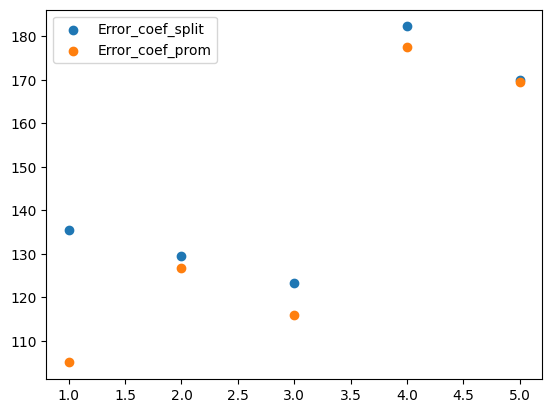

   split  coef_season  coef_mnth   Intercept  Error_medio_abs  Suma_residual  \
0    1.0    39.864525  -4.615899  120.710189         105.0263     14805.5237   
1    2.0    39.864525  -4.615899  120.710189         126.7385     23229.6450   
2    3.0    39.864525  -4.615899  120.710189         115.8613     19801.3981   
3    4.0    39.864525  -4.615899  120.710189         177.6563     52481.6777   
4    5.0    39.864525  -4.615899  120.710189         169.5543     48589.0109   
5    1.0    36.868231 -10.643318  187.391893         135.5543     22663.1128   
6    2.0    48.067590  -5.291276  109.531106         129.4566     23852.7871   
7    3.0    45.203282  -1.151651   92.945541         123.2648     22672.1019   
8    4.0    38.239688  -1.779435   85.279237         182.2762     56724.4410   
9    5.0    30.943836  -4.213816  128.403168         169.9505     50399.7054   

   R2-score  classification  
0  -66.1875             1.0  
1  -64.8848             1.0  
2  -10.0286             1.0  

In [ ]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# Vamos a dividir los datos en 5 pliegues.
# Usaremos este objeto 'kf' (estrategia de división de KFold) como entrada para el método cross_val_score()
kf =KFold(n_splits=5, shuffle=False, random_state=None)

#n_splits es para dividirlos en lotes
#shuffle es para que mezclar los datos antes de dividirlos en lotes.
#random_state es para crear aleatoriedad de cada pliegue
#para este ejercicio queremos que tome los primeros datos, los segundos, y asi sucesivamente

cnt = 1
# split()  method generate indices to split data into training and test set.
# El método split() genera índices para dividir los datos en conjuntos de entrenamiento y prueba.

# df = df.filter(items = [2], axis=0)

from sklearn import linear_model
from sklearn.metrics import r2_score
from pandas._libs.lib import dicts_to_array

regr3 = linear_model.LinearRegression()

dic_result={}

for train_index, test_index in kf.split(X, y):
    #print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}') # caracteristicas de la seleccion
    #print(train_index) #estos son los indices que se usaran

    print()
    print()
    print(f"split = {cnt}")

    #................. start training ....................................
    X_1=X.filter(items = train_index, axis=0)
    Y_1=y.filter(items = train_index, axis=0)
    #print(X_1) dataframe solo de los valores de entrenamiento
    #print(Y_1) dataframe solo de los valores objetivo

    train_x = np.asanyarray(X_1[['season','mnth']])
    train_y = np.asanyarray(Y_1)
    test_y_=regr3.fit (train_x, train_y)
    # The coefficients
    print ('Coefficients: ', regr3.coef_)
    print ('Intercept: ',regr3.intercept_)
    #................. finish training ....................................
    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)    

    test_x = np.asanyarray(X_2[['season','mnth']])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = regr3.predict(test_x)

    print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_result[cnt]=[regr3.coef_.tolist(),regr3.intercept_,round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1


#nombre de columnas de dataframe resultados

lista_nombres_columnas=["split",'coef_season','coef_mnth',"Intercept","Error_medio_abs",
                        "Suma_residual","R2-score"]
dict_result_1={}
list_temp=[]

# .............. inicio pasar todo a un dataframe de resultados ....................

for i in dic_result:
  list_temp.append(i)

  for ii in dic_result[i][0]:
    list_temp.append(ii)
  
  for ii in dic_result[i][1:]:
    list_temp.append(ii)

  dict_result_1[i]=list_temp

  list_temp=[]

for i in dict_result_1:

  list_temp.append(dict_result_1[i])

array_temp_2=np.array(list_temp)

#print(array_temp_2)

data_result=pd.DataFrame(array_temp_2,columns=lista_nombres_columnas)

print(data_result)

# .............. fin pasar todo a un dataframe de resultados ....................

# .............. inicio conseguir el valor medio de los coeficientes y el intercepto ...........

data_valor_medio=data_result[['coef_season','coef_mnth',"Intercept"]].mean()

print()
print("VALORES DE LOS MEJORES COEFICIENTES Y EL INTERCEPTO, OBTENIDOS DEL PROMEDIO DE USAR 5 SPLITS CON ---> K-fold cross validation")
print("Valores_coef_promedio")
print(data_valor_medio)

# .............. fin conseguir el valor medio de los coeficientes y el intercepto ...........

# .............. inicio analizar el training con los nuevos valores ...........

array_coeficientes=np.array(data_valor_medio.values.tolist())

dic_array_split={}

cnt = 1

print()
print()

for train_index, test_index in kf.split(X, y):

    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)
    X_2['Intercept']=1    

    test_x = np.asanyarray(X_2[['season','mnth',"Intercept"]])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = test_x.dot(array_coeficientes)

    #print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    #print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    #print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_array_split[cnt]=[array_coeficientes.tolist(),round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1

#print(dic_array_split)
# .............. fin analizar el training con los nuevos valores ...........

# .............. inicio pasar todo a un dataframe de resultados ....................

dic_result_2={}

list_temp=[]

for i in dic_array_split:
  list_temp.append(i)

  for ii in dic_array_split[i][0]:
    list_temp.append(ii)

  for ii in dic_array_split[i][1:]:
    list_temp.append(ii)

  dic_result_2[i]=list_temp

  list_temp=[]

for i in dic_result_2:

  list_temp.append(dic_result_2[i])

array_temp=np.array(list_temp)

array_temp=np.insert(array_temp, array_temp.shape[1], np.array((1, 1, 1, 1, 1)), 1)
array_temp_2=np.insert(array_temp_2, array_temp_2.shape[1], np.array((0, 0, 0, 0, 0)), 1)

array_temp_3=np.concatenate((array_temp, array_temp_2), axis=0)

#print(array_temp_3)

lista_nombres_columnas.append("classification")

data_result_2=pd.DataFrame(array_temp_3,columns=lista_nombres_columnas)

#print(data_result_2)

data_filter_1=data_result_2[(data_result_2["classification"]==1)]
data_filter_0=data_result_2[(data_result_2["classification"]==0)]

x_graf_0=data_filter_0[["split"]].values.tolist()
y_graf_0=data_filter_0[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf_0, y_graf_0,label="Error_coef_split")
x_graf=data_filter_1[["split"]].values.tolist()
y_graf=data_filter_1[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf, y_graf,label="Error_coef_prom")
plt.legend()
plt.show()

print(data_result_2)
# .............. fin pasar todo a un dataframe de resultados ....................

data_result_2["analisis"]="season_mnth"

dic_data_resultados["season_mnth"]=data_result_2

dic_variables["season_mnth"]=['season','mnth']




split = 1
Coefficients:  [ 37.04686639 -10.68424017  11.55000642]
Intercept:  54.12403899762589
Error medio absoluto: 130.20
Suma residual de los cuadrados (MSE): 23032.03
R2-score: -2.58


split = 2
Coefficients:  [48.26620924 -5.23830788 10.22449389]
Intercept:  -9.419862146245663
Error medio absoluto: 111.35
Suma residual de los cuadrados (MSE): 18154.29
R2-score: -2.29


split = 3
Coefficients:  [45.73311632 -1.05493943 11.20788191]
Intercept:  -38.52178090472276
Error medio absoluto: 113.20
Suma residual de los cuadrados (MSE): 21242.49
R2-score: -1.12


split = 4
Coefficients:  [38.39891448 -1.71529764  9.17610069]
Intercept:  -21.619522372858626
Error medio absoluto: 156.21
Suma residual de los cuadrados (MSE): 47499.40
R2-score: -9.92


split = 5
Coefficients:  [31.32828488 -4.16664989  9.6936625 ]
Intercept:  15.337426189190694
Error medio absoluto: 149.17
Suma residual de los cuadrados (MSE): 42751.92
R2-score: -7.22
   split  coef_season  coef_mnth    coef_hr  Intercept  E

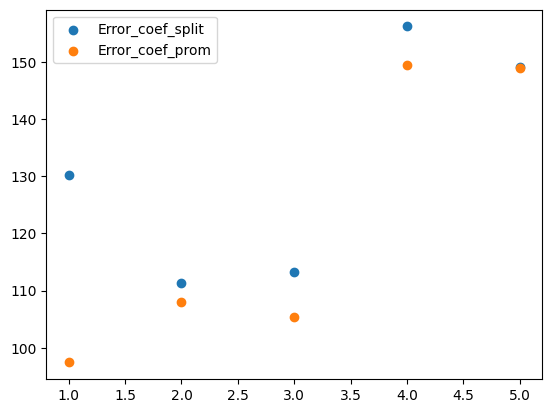

   split  coef_season  coef_mnth    coef_hr  Intercept  Error_medio_abs  \
0    1.0    40.154678  -4.571887  10.370429  -0.019940          97.4204   
1    2.0    40.154678  -4.571887  10.370429  -0.019940         107.9260   
2    3.0    40.154678  -4.571887  10.370429  -0.019940         105.4537   
3    4.0    40.154678  -4.571887  10.370429  -0.019940         149.5288   
4    5.0    40.154678  -4.571887  10.370429  -0.019940         148.9728   
5    1.0    37.046866 -10.684240  11.550006  54.124039         130.1976   
6    2.0    48.266209  -5.238308  10.224494  -9.419862         111.3490   
7    3.0    45.733116  -1.054939  11.207882 -38.521781         113.1978   
8    4.0    38.398914  -1.715298   9.176101 -21.619522         156.2102   
9    5.0    31.328285  -4.166650   9.693662  15.337426         149.1732   

   Suma_residual  R2-score  classification  
0     14325.2525   -1.7045             1.0  
1     17535.6798   -2.1943             1.0  
2     17982.2620   -1.5724             

In [ ]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# Vamos a dividir los datos en 5 pliegues.
# Usaremos este objeto 'kf' (estrategia de división de KFold) como entrada para el método cross_val_score()
kf =KFold(n_splits=5, shuffle=False, random_state=None)

#n_splits es para dividirlos en lotes
#shuffle es para que mezclar los datos antes de dividirlos en lotes.
#random_state es para crear aleatoriedad de cada pliegue
#para este ejercicio queremos que tome los primeros datos, los segundos, y asi sucesivamente

cnt = 1
# split()  method generate indices to split data into training and test set.
# El método split() genera índices para dividir los datos en conjuntos de entrenamiento y prueba.

# df = df.filter(items = [2], axis=0)

from sklearn import linear_model
from sklearn.metrics import r2_score
from pandas._libs.lib import dicts_to_array

regr3 = linear_model.LinearRegression()

dic_result={}

for train_index, test_index in kf.split(X, y):
    #print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}') # caracteristicas de la seleccion
    #print(train_index) #estos son los indices que se usaran

    print()
    print()
    print(f"split = {cnt}")

    #................. start training ....................................
    X_1=X.filter(items = train_index, axis=0)
    Y_1=y.filter(items = train_index, axis=0)
    #print(X_1) dataframe solo de los valores de entrenamiento
    #print(Y_1) dataframe solo de los valores objetivo

    train_x = np.asanyarray(X_1[['season','mnth','hr']])
    train_y = np.asanyarray(Y_1)
    test_y_=regr3.fit (train_x, train_y)
    # The coefficients
    print ('Coefficients: ', regr3.coef_)
    print ('Intercept: ',regr3.intercept_)
    #................. finish training ....................................
    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)    

    test_x = np.asanyarray(X_2[['season','mnth','hr']])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = regr3.predict(test_x)

    print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_result[cnt]=[regr3.coef_.tolist(),regr3.intercept_,round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1


#nombre de columnas de dataframe resultados

lista_nombres_columnas=["split",'coef_season','coef_mnth','coef_hr',"Intercept","Error_medio_abs",
                        "Suma_residual","R2-score"]
dict_result_1={}
list_temp=[]

# .............. inicio pasar todo a un dataframe de resultados ....................

for i in dic_result:
  list_temp.append(i)

  for ii in dic_result[i][0]:
    list_temp.append(ii)
  
  for ii in dic_result[i][1:]:
    list_temp.append(ii)

  dict_result_1[i]=list_temp

  list_temp=[]

for i in dict_result_1:

  list_temp.append(dict_result_1[i])

array_temp_2=np.array(list_temp)

#print(array_temp_2)

data_result=pd.DataFrame(array_temp_2,columns=lista_nombres_columnas)

print(data_result)

# .............. fin pasar todo a un dataframe de resultados ....................

# .............. inicio conseguir el valor medio de los coeficientes y el intercepto ...........

data_valor_medio=data_result[['coef_season','coef_mnth','coef_hr',"Intercept"]].mean()

print()
print("VALORES DE LOS MEJORES COEFICIENTES Y EL INTERCEPTO, OBTENIDOS DEL PROMEDIO DE USAR 5 SPLITS CON ---> K-fold cross validation")
print("Valores_coef_promedio")
print(data_valor_medio)

# .............. fin conseguir el valor medio de los coeficientes y el intercepto ...........

# .............. inicio analizar el training con los nuevos valores ...........

array_coeficientes=np.array(data_valor_medio.values.tolist())

dic_array_split={}

cnt = 1

print()
print()

for train_index, test_index in kf.split(X, y):

    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)
    X_2['Intercept']=1    

    test_x = np.asanyarray(X_2[['season','mnth','hr',"Intercept"]])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = test_x.dot(array_coeficientes)

    #print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    #print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    #print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_array_split[cnt]=[array_coeficientes.tolist(),round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1

#print(dic_array_split)
# .............. fin analizar el training con los nuevos valores ...........

# .............. inicio pasar todo a un dataframe de resultados ....................

dic_result_2={}

list_temp=[]

for i in dic_array_split:
  list_temp.append(i)

  for ii in dic_array_split[i][0]:
    list_temp.append(ii)

  for ii in dic_array_split[i][1:]:
    list_temp.append(ii)

  dic_result_2[i]=list_temp

  list_temp=[]

for i in dic_result_2:

  list_temp.append(dic_result_2[i])

array_temp=np.array(list_temp)

array_temp=np.insert(array_temp, array_temp.shape[1], np.array((1, 1, 1, 1, 1)), 1)
array_temp_2=np.insert(array_temp_2, array_temp_2.shape[1], np.array((0, 0, 0, 0, 0)), 1)

array_temp_3=np.concatenate((array_temp, array_temp_2), axis=0)

#print(array_temp_3)

lista_nombres_columnas.append("classification")

data_result_2=pd.DataFrame(array_temp_3,columns=lista_nombres_columnas)

#print(data_result_2)

data_filter_1=data_result_2[(data_result_2["classification"]==1)]
data_filter_0=data_result_2[(data_result_2["classification"]==0)]

x_graf_0=data_filter_0[["split"]].values.tolist()
y_graf_0=data_filter_0[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf_0, y_graf_0,label="Error_coef_split")
x_graf=data_filter_1[["split"]].values.tolist()
y_graf=data_filter_1[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf, y_graf,label="Error_coef_prom")
plt.legend()
plt.show()

print(data_result_2)
# .............. fin pasar todo a un dataframe de resultados ....................

data_result_2["analisis"]="season_mnth_hr"

dic_data_resultados["season_mnth_hr"]=data_result_2

dic_variables["season_mnth_hr"]=['season','mnth','hr']




split = 1
Coefficients:  [ 302.21365226 -341.31264976]
Intercept:  265.2341518733039
Error medio absoluto: 96.49
Suma residual de los cuadrados (MSE): 13860.81
R2-score: -0.93


split = 2
Coefficients:  [ 467.06020713 -265.47869179]
Intercept:  142.53472083919866
Error medio absoluto: 142.30
Suma residual de los cuadrados (MSE): 27373.92
R2-score: -2.47


split = 3
Coefficients:  [ 364.49720947 -295.60076735]
Intercept:  192.3201323878085
Error medio absoluto: 86.26
Suma residual de los cuadrados (MSE): 13574.63
R2-score: -1.72


split = 4
Coefficients:  [ 333.08990973 -242.26541311]
Intercept:  168.89708192344636
Error medio absoluto: 149.55
Suma residual de los cuadrados (MSE): 37927.29
R2-score: -5.65


split = 5
Coefficients:  [ 346.22971318 -252.68917994]
Intercept:  159.2349319577401
Error medio absoluto: 147.73
Suma residual de los cuadrados (MSE): 43965.82
R2-score: -6.82
   split   coef_temp    coef_hum   Intercept  Error_medio_abs  Suma_residual  \
0    1.0  302.213652 -341

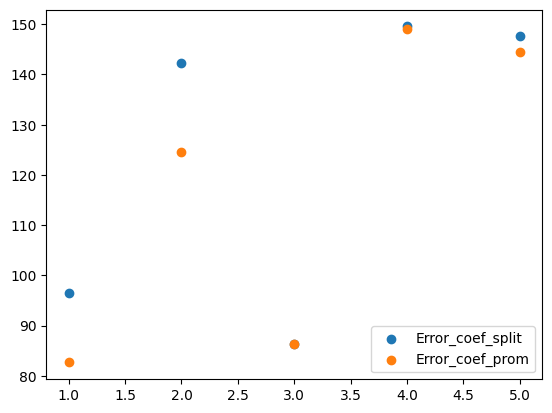

   split   coef_temp    coef_hum   Intercept  Error_medio_abs  Suma_residual  \
0    1.0  362.618138 -279.469340  185.644204          82.6567     10648.7181   
1    2.0  362.618138 -279.469340  185.644204         124.6021     21409.5921   
2    3.0  362.618138 -279.469340  185.644204          86.4319     13448.7566   
3    4.0  362.618138 -279.469340  185.644204         149.1286     36740.8368   
4    5.0  362.618138 -279.469340  185.644204         144.3990     40960.6091   
5    1.0  302.213652 -341.312650  265.234152          96.4950     13860.8146   
6    2.0  467.060207 -265.478692  142.534721         142.3020     27373.9164   
7    3.0  364.497209 -295.600767  192.320132          86.2642     13574.6300   
8    4.0  333.089910 -242.265413  168.897082         149.5546     37927.2893   
9    5.0  346.229713 -252.689180  159.234932         147.7333     43965.8243   

   R2-score  classification  
0   -0.6289             1.0  
1   -2.2769             1.0  
2   -1.9088             1.0  

In [ ]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# Vamos a dividir los datos en 5 pliegues.
# Usaremos este objeto 'kf' (estrategia de división de KFold) como entrada para el método cross_val_score()
kf =KFold(n_splits=5, shuffle=False, random_state=None)

#n_splits es para dividirlos en lotes
#shuffle es para que mezclar los datos antes de dividirlos en lotes.
#random_state es para crear aleatoriedad de cada pliegue
#para este ejercicio queremos que tome los primeros datos, los segundos, y asi sucesivamente

cnt = 1
# split()  method generate indices to split data into training and test set.
# El método split() genera índices para dividir los datos en conjuntos de entrenamiento y prueba.

# df = df.filter(items = [2], axis=0)

from sklearn import linear_model
from sklearn.metrics import r2_score
from pandas._libs.lib import dicts_to_array

regr3 = linear_model.LinearRegression()

dic_result={}

for train_index, test_index in kf.split(X, y):
    #print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}') # caracteristicas de la seleccion
    #print(train_index) #estos son los indices que se usaran

    print()
    print()
    print(f"split = {cnt}")

    #................. start training ....................................
    X_1=X.filter(items = train_index, axis=0)
    Y_1=y.filter(items = train_index, axis=0)
    #print(X_1) dataframe solo de los valores de entrenamiento
    #print(Y_1) dataframe solo de los valores objetivo

    train_x = np.asanyarray(X_1[["temp","hum"]])
    train_y = np.asanyarray(Y_1)
    test_y_=regr3.fit (train_x, train_y)
    # The coefficients
    print ('Coefficients: ', regr3.coef_)
    print ('Intercept: ',regr3.intercept_)
    #................. finish training ....................................
    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)    

    test_x = np.asanyarray(X_2[["temp","hum"]])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = regr3.predict(test_x)

    print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_result[cnt]=[regr3.coef_.tolist(),regr3.intercept_,round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1


#nombre de columnas de dataframe resultados

lista_nombres_columnas=["split","coef_temp","coef_hum","Intercept","Error_medio_abs",
                        "Suma_residual","R2-score"]
dict_result_1={}
list_temp=[]

# .............. inicio pasar todo a un dataframe de resultados ....................

for i in dic_result:
  list_temp.append(i)

  for ii in dic_result[i][0]:
    list_temp.append(ii)
  
  for ii in dic_result[i][1:]:
    list_temp.append(ii)

  dict_result_1[i]=list_temp

  list_temp=[]

for i in dict_result_1:

  list_temp.append(dict_result_1[i])

array_temp_2=np.array(list_temp)

#print(array_temp_2)

data_result=pd.DataFrame(array_temp_2,columns=lista_nombres_columnas)

print(data_result)

# .............. fin pasar todo a un dataframe de resultados ....................

# .............. inicio conseguir el valor medio de los coeficientes y el intercepto ...........

data_valor_medio=data_result[["coef_temp","coef_hum","Intercept"]].mean()

print()
print("VALORES DE LOS MEJORES COEFICIENTES Y EL INTERCEPTO, OBTENIDOS DEL PROMEDIO DE USAR 5 SPLITS CON ---> K-fold cross validation")
print("Valores_coef_promedio")
print(data_valor_medio)

# .............. fin conseguir el valor medio de los coeficientes y el intercepto ...........

# .............. inicio analizar el training con los nuevos valores ...........

array_coeficientes=np.array(data_valor_medio.values.tolist())

dic_array_split={}

cnt = 1

print()
print()

for train_index, test_index in kf.split(X, y):

    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)
    X_2['Intercept']=1    

    test_x = np.asanyarray(X_2[["temp","hum","Intercept"]])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = test_x.dot(array_coeficientes)

    #print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    #print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    #print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_array_split[cnt]=[array_coeficientes.tolist(),round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1

#print(dic_array_split)
# .............. fin analizar el training con los nuevos valores ...........

# .............. inicio pasar todo a un dataframe de resultados ....................

dic_result_2={}

list_temp=[]

for i in dic_array_split:
  list_temp.append(i)

  for ii in dic_array_split[i][0]:
    list_temp.append(ii)

  for ii in dic_array_split[i][1:]:
    list_temp.append(ii)

  dic_result_2[i]=list_temp

  list_temp=[]

for i in dic_result_2:

  list_temp.append(dic_result_2[i])

array_temp=np.array(list_temp)

array_temp=np.insert(array_temp, array_temp.shape[1], np.array((1, 1, 1, 1, 1)), 1)
array_temp_2=np.insert(array_temp_2, array_temp_2.shape[1], np.array((0, 0, 0, 0, 0)), 1)

array_temp_3=np.concatenate((array_temp, array_temp_2), axis=0)

#print(array_temp_3)

lista_nombres_columnas.append("classification")

data_result_2=pd.DataFrame(array_temp_3,columns=lista_nombres_columnas)

#print(data_result_2)

data_filter_1=data_result_2[(data_result_2["classification"]==1)]
data_filter_0=data_result_2[(data_result_2["classification"]==0)]

x_graf_0=data_filter_0[["split"]].values.tolist()
y_graf_0=data_filter_0[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf_0, y_graf_0,label="Error_coef_split")
x_graf=data_filter_1[["split"]].values.tolist()
y_graf=data_filter_1[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf, y_graf,label="Error_coef_prom")
plt.legend()
plt.show()

print(data_result_2)
# .............. fin pasar todo a un dataframe de resultados ....................

data_result_2["analisis"]="temp_hum"

dic_data_resultados["temp_hum"]=data_result_2

dic_variables["temp_hum"]=["temp","hum"]


In [ ]:
print(dic_data_resultados)

{'todas_las_variables':    split  coef_season  coef_mnth   coef_hr  coef_holiday  coef_weathersit  \
0    1.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
1    2.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
2    3.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
3    4.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
4    5.0    18.134305   0.013720  7.456934    -24.803031        -1.520432   
5    1.0    19.832336  -3.055482  8.393182    -30.481082         2.168786   
6    2.0    20.669161  -0.029773  7.036863    -33.133498        -5.306035   
7    3.0    21.055583   3.990148  8.151219    -13.739663        -0.143022   
8    4.0    23.680394   1.038969  6.746615    -24.538217         0.270451   
9    5.0     5.434052  -1.875264  6.956793    -22.122695        -4.592341   

    coef_temp  coef_atemp    coef_hum  coef_windspeed  Intercept  \
0  107.403368  213.881270 -220.781600       28.276115  39.19

In [ ]:

list_data_concat=[]

for i in dic_data_resultados:

  data_2=dic_data_resultados[i][["analisis","split","Error_medio_abs","classification"]]

  list_data_concat.append(data_2)


data_concat_1=pd.concat(list_data_concat, axis=0)

data_concat_1=data_concat_1[data_concat_1["classification"]==1]

df1=data_concat_1.groupby('analisis', as_index=False)['Error_medio_abs'].sum()
df1=df1.sort_values('Error_medio_abs',ascending=True)
print(df1)
is_max = df1.loc[:, 'Error_medio_abs']==df1["Error_medio_abs"].min()
df_max = df1.loc[is_max]
print()
print()
print("VARIABLES QUE GENERAN EL MENOR ERROR ACUMULADO")
list_12=df_max.values.tolist()
print(dic_variables[list_12[0][0]])

print()
print()
print("ANALISIS QUE GENERA EL MENOR ERROR ACUMULADO")
df_max.head()




              analisis  Error_medio_abs
4  todas_las_variables         541.5135
3             temp_hum         587.2183
2       season_mnth_hr         609.3017
1          season_mnth         694.8367
0               season         695.1786


VARIABLES QUE GENERAN EL MENOR ERROR ACUMULADO
['season', 'mnth', 'hr', 'holiday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'Intercept']


ANALISIS QUE GENERA EL MENOR ERROR ACUMULADO


,analisis,Error_medio_abs
4,todas_las_variables,541.5135
